In [1]:
import pandas as pd
import torch
import numpy as np
import random
np.random.seed(17)
random.seed(17)
torch.manual_seed(17)
import data
from models import LinearPytorchModel
from agent import Agent

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
player_features = ['total_points', 'ict_index', 'goals_scored', 'assists', 'clean_sheets']
model_paths = ["./trained_models/simple_linear_model.pt"]
data_object = data.Data()
agent = Agent(data_object=data_object, player_features=player_features, opposition_features=[], model_class=LinearPytorchModel, model_path=model_paths[0], visualize = False)
agent.update_model()

tensor(0.1923, dtype=torch.float64) tensor(0.1538, dtype=torch.float64)
model saved, loss =  0.15238550528772177


tensor(0.1923, dtype=torch.float64) tensor(0.1538, dtype=torch.float64)
model saved, loss =  0.057268503117241534


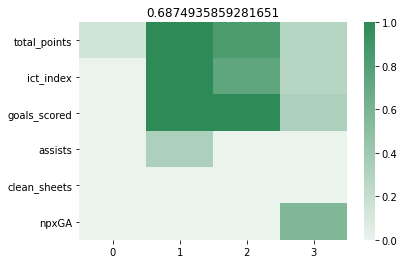

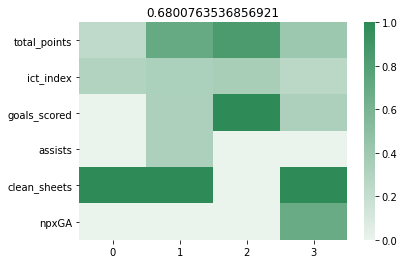

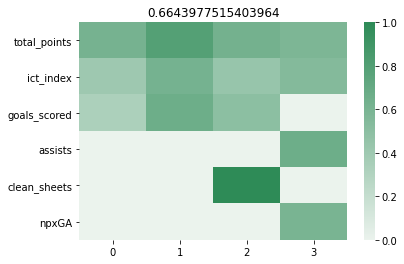

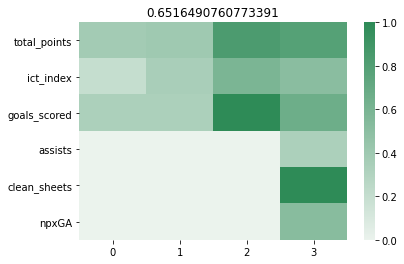

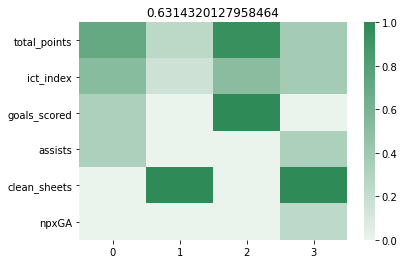

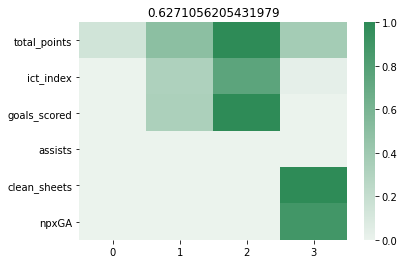

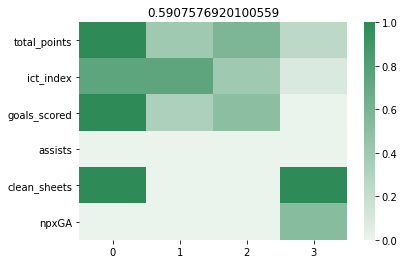

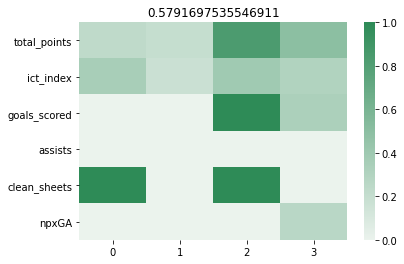

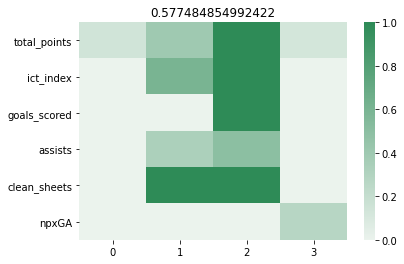

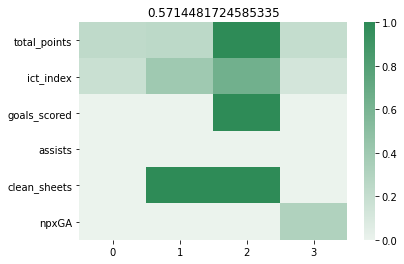

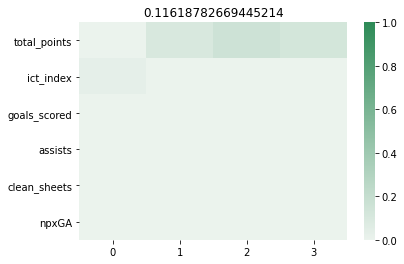

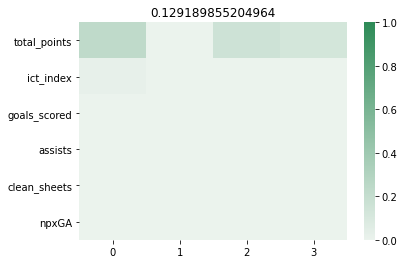

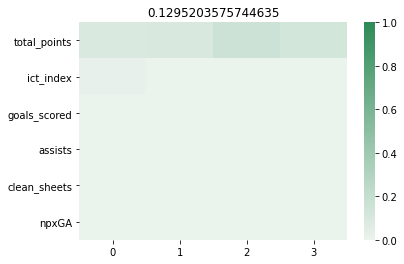

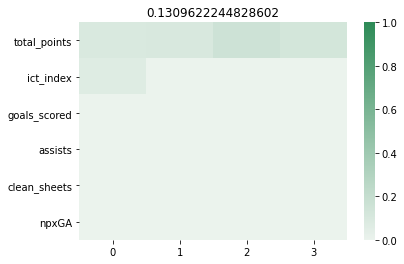

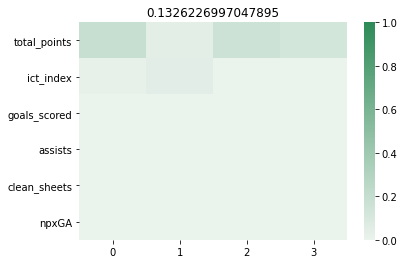

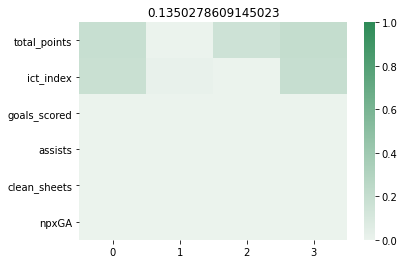

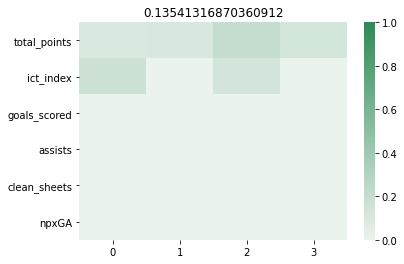

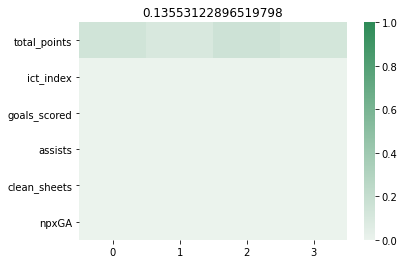

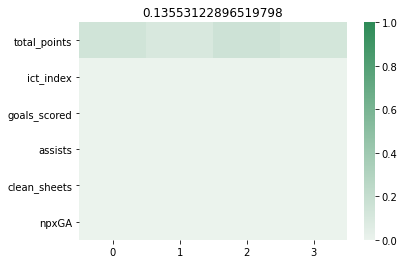

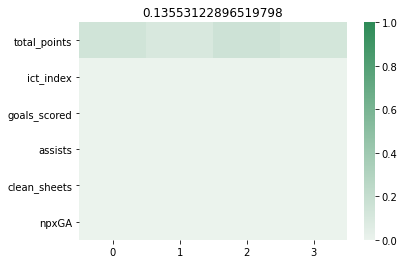

In [5]:
player_features = ['total_points', 'ict_index', 'goals_scored', 'assists', 'clean_sheets']
opposition_features = [ "npxGA"]
model_paths = ["./trained_models/simple_linear_model_opposition.pt"]
data_object = data.Data()
agent = Agent(data_object=data_object, player_features=player_features, opposition_features=opposition_features, model_class=LinearPytorchModel, model_path=model_paths[0], visualize = True)
agent.update_model()

In [4]:
import seaborn as sns
weights = next(agent.model.model.parameters())[0].reshape((6, 4)).detach().numpy()
weights

RuntimeError: shape '[6, 4]' is invalid for input of size 20